In [3]:
#Importing functions library

import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
#from matplotlib.patches import ConnectionPatch
#from collections import OrderedDict
#from matplotlib.gridspec import GridSpec
#from mpl_toolkits.basemap import Basemap
#from sklearn import metrics, linear_model
#from sklearn.preprocessing import PolynomialFeatures, StandardScaler
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
#from scipy.optimize import curve_fit


In [4]:
#Importing data sets

flights_df = pd.read_csv("Flights.csv")
flights_df.head(3)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#Columns in Dataset
print(flights_df.columns)

#Data types 
print(flights_df.dtypes)

#Size of dataset
print(flights_df.shape)

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')
YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64

In [8]:
#Selecting the data of interest 
clean_df = flights_df.copy()
clean_df = clean_df[['SCHEDULED_DEPARTURE','DEPARTURE_TIME','DEPARTURE_DELAY', 'TAXI_OUT','WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE','WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME','ARRIVAL_DELAY']]
clean_df.head()

#SCHEDULED_DEPARTURE and SCHEDULED_ARRIVAL : scheduled times of take-off and landing 
#DEPARTURE_TIME and ARRIVAL_TIME: real times at which take-off and landing took place 
#DEPARTURE_DELAY and ARRIVAL_DELAY: difference (in minutes) between planned and real times 
#DISTANCE: distance (in miles) 

,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0
1,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0
2,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0
3,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0
4,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0


In [11]:
#Information on Column Types and No of Null Values

tab_info=pd.DataFrame(clean_df.dtypes).T.rename(index={0:'Column Type'})
tab_info=tab_info.append(pd.DataFrame(clean_df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(clean_df.isnull().sum()/clean_df.shape[0]*100).T.rename(index={0:'null values (%)'}))
tab_info

,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
Column Type,int64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64
null values (nb),0,39515,39515,40229,40229,2,43071,43071,0,41296,41296,0,41296,43071
null values (%),0,3.76845,3.76845,3.83654,3.83654,0.000190735,4.10757,4.10757,0,3.9383,3.9383,0,3.9383,4.10757


In [23]:
# Removing rows with null values

clean_df.dropna(axis = 0, how = "any", inplace= True)
#clean_df.dropna()

#check if there is still null values
tab_info=pd.DataFrame(clean_df.dtypes).T.rename(index={0:'Column Type'})
tab_info=tab_info.append(pd.DataFrame(clean_df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(clean_df.isnull().sum()/clean_df.shape[0]*100).T.rename(index={0:'null values (%)'}))
tab_info

#separating early departures and early arrivals 

cond_early_depart = clean_df["DEPARTURE_DELAY"] < 0 #Flights leaving early
cond_timely_depart = clean_df ["DEPARTURE_DELAY"] == 0 #Flights with no delays

cond_late_depart = clean_df["DEPARTURE_DELAY"] > 0 #Flights with late departure
cond_late_arr = clean_df["ARRIVAL_DELAY"] > 0 

clean_delay = clean_df[cond_late_depart & cond_late_arr]
clean_delay.head()


,DEPARTURE_DELAY,ARRIVAL_DELAY
20,25.0,6.0
27,12.0,25.0
29,21.0,2.0
30,72.0,43.0
52,95.0,85.0


In [24]:
#Statistical Summary
delays = clean_delay[["DEPARTURE_DELAY", "ARRIVAL_DELAY"]]
delays.head()
delays.describe()

,DEPARTURE_DELAY,ARRIVAL_DELAY
count,309729.000000,309729.000000
mean,42.857937,43.388546
std,58.449003,59.661364
min,1.000000,1.000000
25%,11.000000,10.000000
50%,25.000000,24.000000
75%,53.000000,54.000000
max,1988.000000,1971.000000


In [40]:
#Counting the number of flights at each scheduled departure timing
flights_count = clean_delay.groupby("SCHEDULED_DEPARTURE")
flights_count = flights_count.size().reset_index(name = "No of flights departing")
flights_count.head()


,SCHEDULED_DEPARTURE,No of flights departing
0,1,1
1,5,18
2,10,3
3,15,31
4,20,38


In [42]:
flights_count["No of flights departing"].describe()

count    1206.000000
mean      256.823383
std       426.736392
min         1.000000
25%        39.000000
50%       102.000000
75%       161.000000
max      2814.000000
Name: No of flights departing, dtype: float64

Text(0,0.5,'No of Flights Departing')

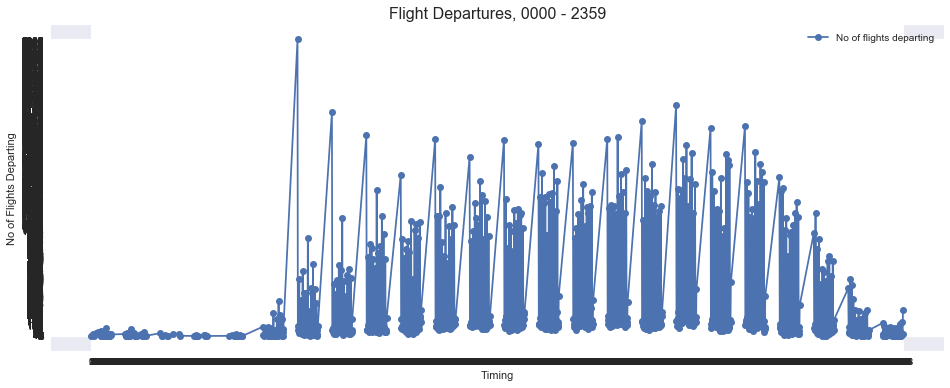

In [45]:
# Visualising the data 

#A) Number of Flights at Different Depature Timing

DIMS = (16,6)
sns.set()

fig = plt.figure(figsize = DIMS)
ax1 = fig.add_subplot(111)

ax1.set_title("Flight Departures, 0000 - 2359", fontsize = 16)
flights_count.plot(kind = "line", 
                  x= 'SCHEDULED_DEPARTURE', 
                  y = 'No of flights departing', 
                  ax = ax1, 
                  marker = 'o'
)

plt.xticks(np.arange(0,2359))
plt.xlabel("Timing")

plt.yticks(np.arange(1,2815))
plt.ylabel("No of Flights Departing")

C:\Users\Seng Jing Yi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


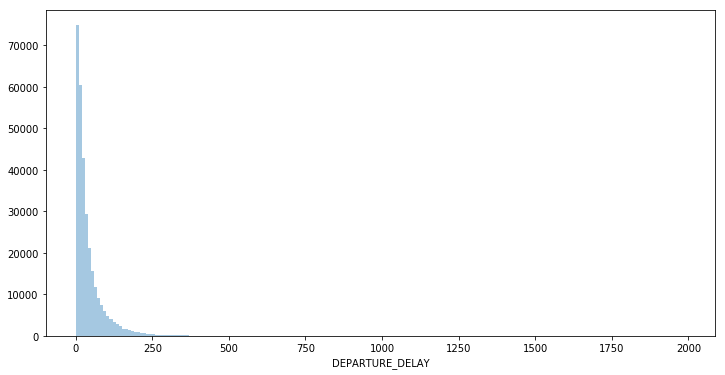

In [36]:
#B) Number of delays in 4 bins 25%,50%,75%,100%fig, ax1 = plt.subplots(figsize = (12,6))
fig,ax1 = plt.subplots(figsize = (12,6))

sns.distplot(
    clean_delay["DEPARTURE_DELAY"],
    kde = False, 
    bins = 200, 
    ax = ax1
)

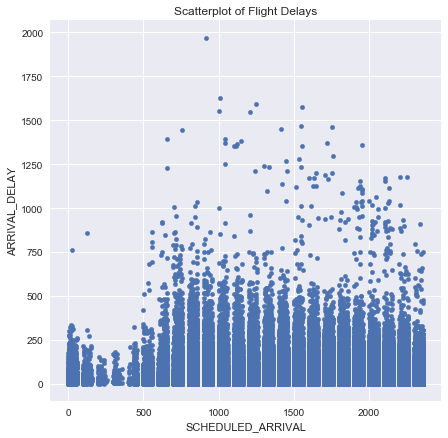

In [46]:
# Plot scatter plot

fig, ax1 = plt.subplots()
clean_delay.plot(
    kind='scatter', ax=ax1,
    title='Scatterplot of Flight Delays',
    x='SCHEDULED_ARRIVAL', y='ARRIVAL_DELAY',
    figsize=(7, 7),)
ax1.set_ylabel("ARRIVAL_DELAY")
plt.show()


In [10]:
#Statistical Summary of dataset: 
print(flights_df.describe())

            YEAR         MONTH           DAY   DAY_OF_WEEK  FLIGHT_NUMBER  \
count  5819079.0  5.819079e+06  5.819079e+06  5.819079e+06   5.819079e+06   
mean      2015.0  6.524085e+00  1.570459e+01  3.926941e+00   2.173093e+03   
std          0.0  3.405137e+00  8.783425e+00  1.988845e+00   1.757064e+03   
min       2015.0  1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00   
25%       2015.0  4.000000e+00  8.000000e+00  2.000000e+00   7.300000e+02   
50%       2015.0  7.000000e+00  1.600000e+01  4.000000e+00   1.690000e+03   
75%       2015.0  9.000000e+00  2.300000e+01  6.000000e+00   3.230000e+03   
max       2015.0  1.200000e+01  3.100000e+01  7.000000e+00   9.855000e+03   

       SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY      TAXI_OUT  \
count         5.819079e+06    5.732926e+06     5.732926e+06  5.730032e+06   
mean          1.329602e+03    1.335204e+03     9.370158e+00  1.607166e+01   
std           4.837518e+02    4.964233e+02     3.708094e+01  8.895574e+00  

In [25]:
#Cleaning the data 

#Selecting the data of interest
df_interest = flights_df[["AIRLINE", "FLIGHT_NUMBER", "ARRIVAL_DELAY", "DEPARTURE_DELAY"]][0:20]
print(df_interest)

#Making a copy of the dataset
#df_cl = flights_df.copy()

#test: error 
#df_cl_test = df_cl.copy()
#df_cl_test = df_cl_test["CANCELLATION_REASON", 'AIR_SYSTEM_DELAY']
#df_cl_test.head()

#Changing the "Nil Returns" to 0
#df["CANCELLATION_REASON"] = df["CANCELLATION_REASON"].replace("", 0)

   AIRLINE  FLIGHT_NUMBER  ARRIVAL_DELAY  DEPARTURE_DELAY
0       AS             98          -22.0            -11.0
1       AA           2336           -9.0             -8.0
2       US            840            5.0             -2.0
3       AA            258           -9.0             -5.0
4       AS            135          -21.0             -1.0
5       DL            806            8.0             -5.0
6       NK            612          -17.0             -6.0
7       US           2013          -10.0             14.0
8       AA           1112          -13.0            -11.0
9       DL           1173          -15.0              3.0
10      DL           2336          -30.0             -6.0
11      AA           1674          -10.0             -8.0
12      DL           1434           -4.0              0.0
13      DL           2324          -22.0             -6.0
14      DL           2440            8.0             -1.0
15      AS            108          -14.0             -4.0
16      DL    

In [37]:
#analyse missing pattern - matplotlib 
#Removing Outliers for Arrival Delay

quartile_1 = np.percentile(df_interest["ARRIVAL_DELAY"],25) #cannot run the whole sample
quartile_3 = np.percentile(df_interest["ARRIVAL_DELAY"], 75)
print(quartile_1)
print(quartile_3)

iqr = quartile_3 - quartile_1
print(iqr)

lower_bound = quartile_1 - 1.5*iqr
upper_bound = quartile_3 + 1.5*iqr

df_interest[(df_interest['ARRIVAL_DELAY'] < lower_bound) | (df_interest['ARRIVAL_DELAY'] > upper_bound)].sort_values(['ARRIVAL_DELAY'])

-18.75
-8.5
10.25


,AIRLINE,FLIGHT_NUMBER,ARRIVAL_DELAY,DEPARTURE_DELAY
5,DL,806,8.0,-5.0
14,DL,2440,8.0,-1.0


In [ ]:
# Use groupby() to aggregate the dataset and then use size() to get the number of records.
# Convert this result to a df, where the size() column is renamed to 'n'
df_p_agg = df_interest.groupby('ARRIVAL_DELAY').size().reset_index(name='n')
# print(df_p_agg) # Uncomment this line to see the results of the aggregation

# Plot the graph
fig, ax = plt.subplots()
df_p_agg.plot(kind='bar', x='points', y='n', ax=ax, figsize=(16, 6), color='tomato',)
# Add the x-axis label, y-axis label (name of the axes) and the title
#ax.set_ylabel("No. of wines")
#ax.set_xlabel("Points")
#plt.title("Distribution of points for wines", fontsize=16)
# Show the result
#plt.show()

In [23]:
#Airlines - drawing map

airport_df = pd.read_csv("airports.csv")
print(airport_df.head())

airport_fil = airport_df.copy()

airport_sort_state = airport_fil.groupby("CITY")
state_count = airport_sort_state.size()
print(state_count)

airport_fil_2 = airport_df.copy()

airport_sort_country = airport_fil_2.groupby("COUNTRY")
country_count = airport_sort_country.size()
print(country_count)

  IATA_CODE                              AIRPORT         CITY STATE COUNTRY  \
0       ABE  Lehigh Valley International Airport    Allentown    PA     USA   
1       ABI             Abilene Regional Airport      Abilene    TX     USA   
2       ABQ    Albuquerque International Sunport  Albuquerque    NM     USA   
3       ABR            Aberdeen Regional Airport     Aberdeen    SD     USA   
4       ABY   Southwest Georgia Regional Airport       Albany    GA     USA   

   LATITUDE  LONGITUDE  
0  40.65236  -75.44040  
1  32.41132  -99.68190  
2  35.04022 -106.60919  
3  45.44906  -98.42183  
4  31.53552  -84.19447  
CITY
Aberdeen                 1
Abilene                  1
Adak                     1
Agana                    1
Aguadilla                1
Akron                    1
Albany                   2
Albuquerque              1
Alexandria               1
Allentown                1
Alpena                   1
Amarillo                 1
Anchorage                1
Appleton           

In [ ]:
#Pivot Table Guide: http://pbpython.com/pandas-pivot-table-explained.html